## This notebook (acsm1.ipynb):
#### 1. Read files in order
#### 2. Plot for selected period
#### 3. Get the top N days with highest total concentration (daily average)

In [1]:
# read in libraries
import sys, os
import netCDF4
import scipy.io, numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.patches as mpatches

In [101]:
import re

# Define the folder path
directory = '/Users/evenhou/Downloads/HOU_data'

# Get a list of all files in the folder
files = os.listdir(directory)

# Filter the list to include only files containing "2022"
filtered_files = [file for file in files if 'acsm' in file]
print(filtered_files)

['houacsmcdceM1.c2.20220617.002223.nc', 'houacsmcdceM1.c2.20220730.000415.nc', 'houacsmcdceM1.c2.20220309.001110.nc', 'houacsmcdceM1.c2.20220414.002151.nc', 'houacsmcdceM1.c2.20220920.000334.nc', 'houacsmcdceM1.c2.20211201.000246.nc', 'houacsmcdceM1.c2.20220203.002405.nc', 'houacsmcdceM1.c2.20220828.001738.nc', 'houacsmcdceM1.c2.20220127.001943.nc', 'houacsmcdceM1.c2.20220208.000008.nc', 'houacsmcdceM1.c2.20211218.001526.nc', 'houacsmcdceM1.c2.20211012.002752.nc', 'houacsmcdceM1.c2.20220102.001146.nc', 'houacsmcdceM1.c2.20220926.000002.nc', 'houacsmcdceM1.c2.20220618.001013.nc', 'houacsmcdceM1.c2.20220711.000530.nc', 'houacsmcdceM1.c2.20220818.001024.nc', 'houacsmcdceM1.c2.20220407.002523.nc', 'houacsmcdceM1.c2.20220302.001356.nc', 'houacsmcdceM1.c2.20220616.002328.nc', 'houacsmcdceM1.c2.20220310.001104.nc', 'houacsmcdceM1.c2.20211106.001615.nc', 'houacsmcdceM1.c2.20220613.002647.nc', 'houacsmcdceM1.c2.20220124.002102.nc', 'houacsmcdceM1.c2.20220329.001906.nc', 'houacsmcdceM1.c2.202204

In [102]:
len(filtered_files)

366

In [103]:
# Sort the list of files alphabetically or numerically
# sorted(filtered_files) # create an array
filtered_files.sort() # modify the original array
print(filtered_files)

['houacsmcdceM1.c2.20210926.130148.nc', 'houacsmcdceM1.c2.20210927.002135.nc', 'houacsmcdceM1.c2.20210928.001644.nc', 'houacsmcdceM1.c2.20210929.001030.nc', 'houacsmcdceM1.c2.20210930.000811.nc', 'houacsmcdceM1.c2.20211001.000553.nc', 'houacsmcdceM1.c2.20211002.000105.nc', 'houacsmcdceM1.c2.20211003.002808.nc', 'houacsmcdceM1.c2.20211004.002542.nc', 'houacsmcdceM1.c2.20211005.002348.nc', 'houacsmcdceM1.c2.20211006.002300.nc', 'houacsmcdceM1.c2.20211007.002220.nc', 'houacsmcdceM1.c2.20211008.000932.nc', 'houacsmcdceM1.c2.20211009.001039.nc', 'houacsmcdceM1.c2.20211010.001954.nc', 'houacsmcdceM1.c2.20211011.002110.nc', 'houacsmcdceM1.c2.20211012.002752.nc', 'houacsmcdceM1.c2.20211013.002902.nc', 'houacsmcdceM1.c2.20211014.000020.nc', 'houacsmcdceM1.c2.20211015.000018.nc', 'houacsmcdceM1.c2.20211016.000014.nc', 'houacsmcdceM1.c2.20211017.002914.nc', 'houacsmcdceM1.c2.20211018.002902.nc', 'houacsmcdceM1.c2.20211019.000024.nc', 'houacsmcdceM1.c2.20211020.000011.nc', 'houacsmcdceM1.c2.202110

In [104]:
type(filtered_files)

list

In [105]:
date_arr = np.array([])
filenames = np.array([])

date_time = np.array([])
days = np.array([])

# time-interval (hourly)
total_organics = np.array([])
sulfate = np.array([])
ammonium = np.array([])
nitrate = np.array([])
chloride = np.array([])
total_conc = np.array([])

# daily
total_organics_d = np.array([])
sulfate_d = np.array([])
ammonium_d = np.array([])
nitrate_d = np.array([])
chloride_d = np.array([])
total_conc_d = np.array([])

# Process each netCDF file
for filename in filtered_files:
    file_path = os.path.join(directory, filename)

    # Open the netCDF file
    ds = netCDF4.Dataset(file_path, 'r')
    s1 = ds.dimensions['time']
    # print(filename)
    # print(s1)
    # print(len(s1))
    # print(s1.size)
    dim_time = s1.size
    # define arrays
    time = np.zeros(dim_time)
    total_organics_i = np.zeros(dim_time)
    sulfate_i = np.zeros(dim_time)
    ammonium_i = np.zeros(dim_time)
    nitrate_i = np.zeros(dim_time)
    chloride_i = np.zeros(dim_time)
    total_conc_i = np.zeros(dim_time)
   
    ncf = scipy.io.netcdf_file(file_path, mmap=False)
    date = int(filename[-18:-10])
    # date = int(filename[-25:-17]) # read i.e. 20210427
    # print(date)
    date_arr = np.append(date_arr,date)
    # print(time.shape)
    # print(ncf.variables["time"].data.shape)

    time[:] = ncf.variables["time"].data/3600 # hr
    total_organics_i[:] = ncf.variables["total_organics_CDCE"].data # ug/m^3
    sulfate_i[:] = ncf.variables["sulfate_CDCE"].data # ug/m^3
    ammonium_i[:] = ncf.variables["ammonium_CDCE"].data # ug/m^3
    nitrate_i[:] = ncf.variables["nitrate_CDCE"].data # ug/m^3
    chloride_i[:] = ncf.variables["chloride_CDCE"].data # ug/m^3  
    total_conc_i[:] = total_organics_i + sulfate_i + ammonium_i + nitrate_i + chloride_i
    # print(time)
    
    # # daily concentration 1 (sum)
    # total_organics_d = np.append(total_organics_d, np.sum(total_organics_i))
    # sulfate_d = np.append(sulfate_d, np.sum(sulfate_i))
    # ammonium_d = np.append(ammonium_d, np.sum(ammonium_i))
    # nitrate_d = np.append(nitrate_d, np.sum(nitrate_i))
    # chloride_d = np.append(chloride_d, np.sum(chloride_i))
    # total_conc_d = np.append(total_conc_d, np.sum(total_conc_i))

    # daily concentration 2 (avg)
    total_organics_d = np.append(total_organics_d, np.mean(total_organics_i))
    sulfate_d = np.append(sulfate_d, np.mean(sulfate_i))
    ammonium_d = np.append(ammonium_d, np.mean(ammonium_i))
    nitrate_d = np.append(nitrate_d, np.mean(nitrate_i))
    chloride_d = np.append(chloride_d, np.mean(chloride_i))
    total_conc_d = np.append(total_conc_d, np.mean(total_conc_i))

    # time-interval concentration
    total_organics = np.append(total_organics,total_organics_i)
    sulfate = np.append(sulfate,sulfate_i)
    ammonium = np.append(ammonium,ammonium_i)
    nitrate = np.append(nitrate,nitrate_i)
    chloride = np.append(chloride,chloride_i)
    total_conc = np.append(total_conc,total_conc_i)

    # Combine the date with each time entry
    date_time_i = [f"{date} {t:.2f}" for t in time]
    # print(time)
    # print(date_time_i)
    # print(type(date_time))
    date_time_i = np.array(date_time_i)
    date_time = np.append(date_time,date_time_i)
    
    # print(len(total_conc_i))
    # print(len(total_conc))
    

In [106]:
# Extract the date part from each element
dates = np.array([dt.split(' ')[0] for dt in date_time])

# Create a boolean masks for dates not in the range
mask = total_conc >= 0
mask_d = total_conc_d >= 0


# Use the mask to filter out unwanted elements
date_time_corrected = date_time[mask]
date_arr_corrected = date_arr[mask_d]

In [107]:
# time-interval concentration
total_organics = total_organics[mask]
sulfate = sulfate[mask]
ammonium = ammonium[mask]
nitrate = nitrate[mask]
chloride = chloride[mask]
total_conc = total_conc[mask]

# daily concentration
total_organics_d = total_organics_d[mask_d]
sulfate_d = sulfate_d[mask_d]
ammonium_d = ammonium_d[mask_d]
nitrate_d = nitrate_d[mask_d]
chloride_d = chloride_d[mask_d]
total_conc_d = total_conc_d[mask_d]


In [108]:
# max_index = np.argmax(total_conc)
# max_index

In [109]:
# # just for the outlier in 202208

# # Condition to remove elements greater than 30 in total_conc (the outlier)
# condition = total_conc <= 30

# # Filter both arrays based on the condition
# total_conc = total_conc[condition]
# date_time_corrected = date_time_corrected[condition]
# total_organics = total_organics[condition]
# sulfate = sulfate[condition]
# ammonium = ammonium[condition]
# nitrate = nitrate[condition]
# chloride = chloride[condition]

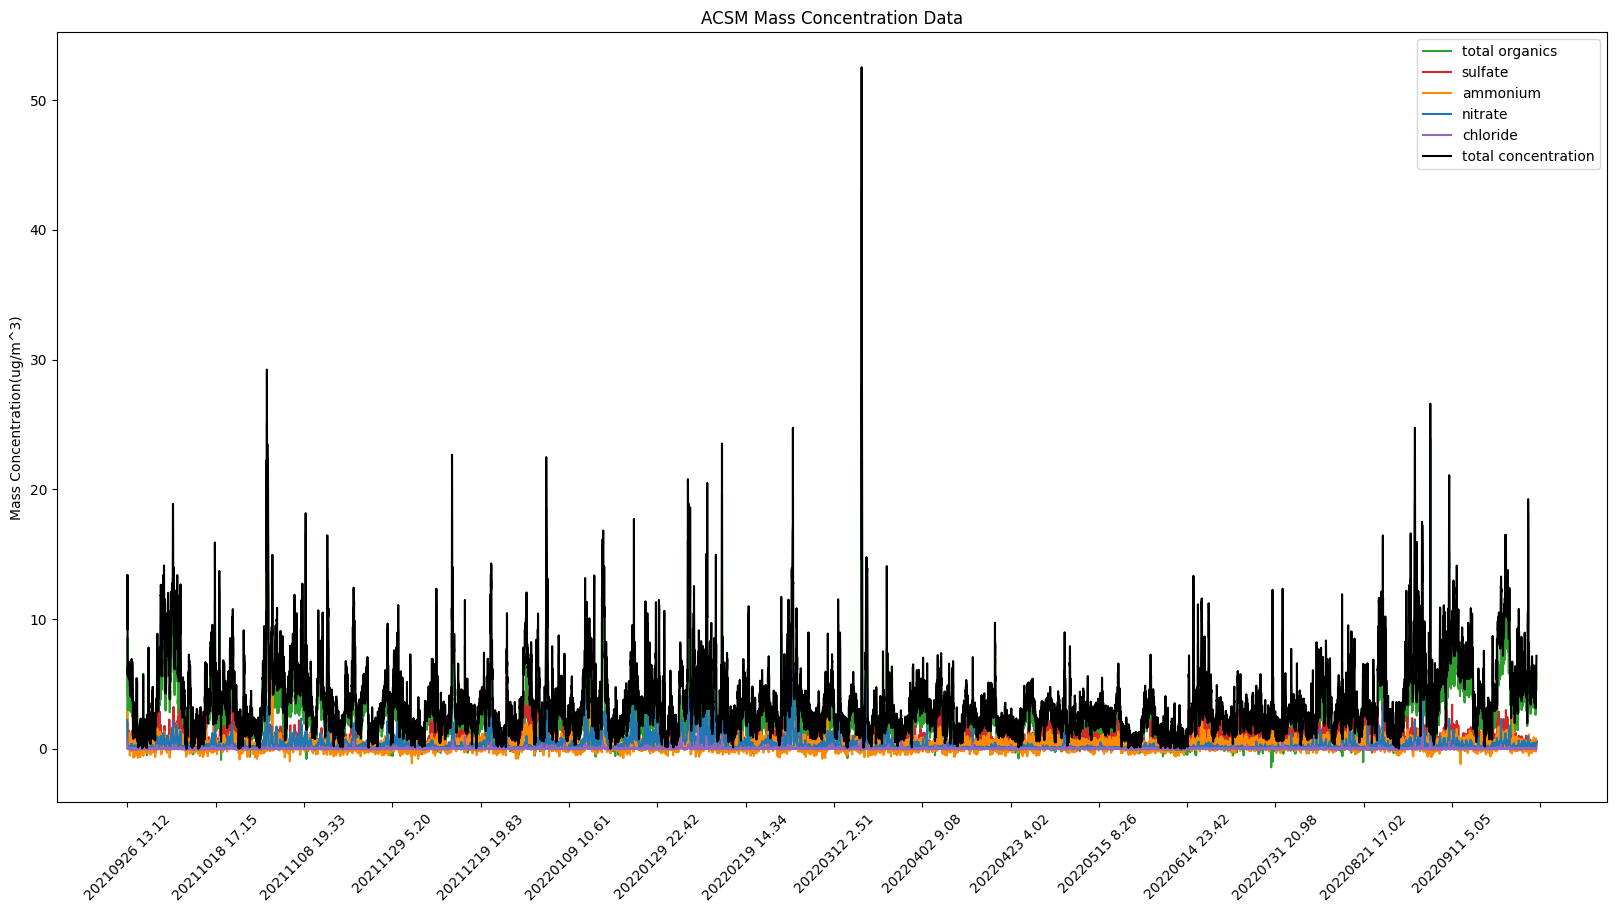

In [110]:
plt.figure(figsize=(20,10))
plt.plot(date_time_corrected,total_organics, label='total organics', c='tab:green')
plt.plot(date_time_corrected,sulfate, label='sulfate', c='tab:red')
plt.plot(date_time_corrected,ammonium, label='ammonium', c='darkorange')
plt.plot(date_time_corrected,nitrate, label='nitrate', c='tab:blue')
plt.plot(date_time_corrected,chloride, label='chloride', c='tab:purple')
plt.plot(date_time_corrected,total_conc, label='total concentration', c='black')
# date_str = f"{date:8}"  # Convert to string for formatting
# formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
plt.title(f'ACSM Mass Concentration Data')
# plt.xlabel('Time')
plt.ylabel('Mass Concentration(ug/m^3)')
plt.legend()
plt.xticks(rotation=45)
# plt.grid(True)
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Set nbins to your preference

plt.show()

In [123]:
date_arr_corrected

array([20210928., 20210929., 20211001., 20211002., 20211003., 20211004.,
       20211005., 20211006., 20211007., 20211008., 20211009., 20211010.,
       20211011., 20211013., 20211014., 20211015., 20211016., 20211017.,
       20211018., 20211022., 20211024., 20211025., 20211026., 20211028.,
       20211029., 20211030., 20211031., 20211101., 20211102., 20211103.,
       20211104., 20211105., 20211106., 20211107., 20211108., 20211109.,
       20211110., 20211111., 20211112., 20211113., 20211114., 20211115.,
       20211116., 20211117., 20211118., 20211119., 20211120., 20211122.,
       20211124., 20211125., 20211126., 20211127., 20211128., 20211130.,
       20211201., 20211203., 20211204., 20211205., 20211206., 20211207.,
       20211208., 20211209., 20211210., 20211212., 20211213., 20211214.,
       20211215., 20211218., 20211220., 20211221., 20211222., 20211223.,
       20211224., 20211225., 20211226., 20211227., 20211228., 20220101.,
       20220103., 20220104., 20220105., 20220106., 

In [124]:
# Convert float dates to integers (removes the decimal point)
date_arr_corrected = date_arr_corrected.astype(int)

In [127]:
from datetime import datetime
# Convert to string and then to datetime objects
date_arr_corrected = [datetime.strptime(str(date), "%Y%m%d") for date in date_arr_corrected]

In [128]:
type(date_arr_corrected)

list

In [130]:
# # Print the result
# for date in date_arr_corrected:
#     print(date.strftime('%Y-%m-%d'))

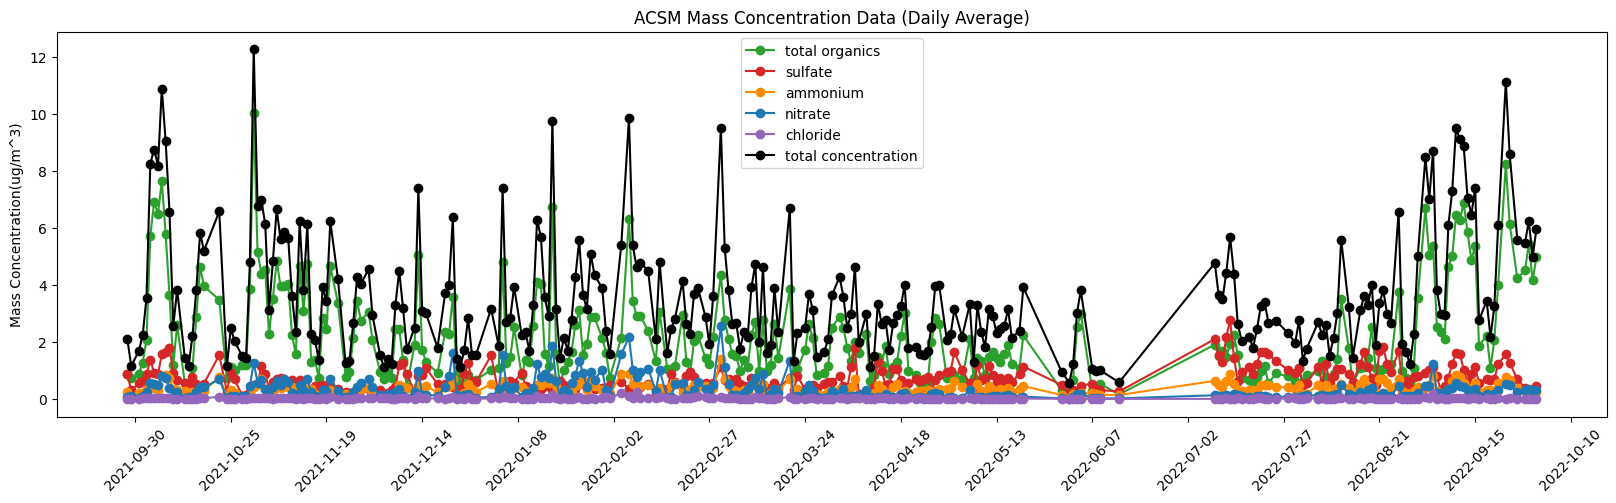

In [132]:
plt.figure(figsize=(20,5))
plt.plot(date_arr_corrected,total_organics_d, label='total organics', c='tab:green', marker = 'o')
plt.plot(date_arr_corrected,sulfate_d, label='sulfate', c='tab:red', marker = 'o')
plt.plot(date_arr_corrected,ammonium_d, label='ammonium', c='darkorange', marker = 'o')
plt.plot(date_arr_corrected,nitrate_d, label='nitrate', c='tab:blue', marker = 'o')
plt.plot(date_arr_corrected,chloride_d, label='chloride', c='tab:purple', marker = 'o')
plt.plot(date_arr_corrected,total_conc_d, label='total concentration', c='black', marker = 'o')
# date_str = f"{date:8}"  # Convert to string for formatting
# formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
plt.title(f'ACSM Mass Concentration Data (Daily Average)')
# plt.xlabel('Time')
plt.ylabel('Mass Concentration(ug/m^3)')
plt.legend()
plt.xticks(rotation=45)
# plt.grid(True)
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Set nbins to your preference

plt.show()

## Top N days daily average

In [113]:
total_conc_d

array([ 2.10161744,  1.15737445,  1.6796659 ,  2.24260878,  3.55218286,
        8.26333973,  8.75603894,  8.18799613, 10.89691199,  9.03942116,
        6.57007092,  2.56240751,  3.83300046,  1.45180866,  1.16663656,
        2.1998654 ,  3.82439184,  5.83167304,  5.20227711,  6.58173206,
        1.14645065,  2.48157987,  2.03984131,  1.49068063,  1.44713344,
        4.807846  , 12.28321972,  6.78771549,  6.969296  ,  6.14196835,
        3.11822724,  4.84054763,  6.65559887,  5.61431159,  5.85821851,
        5.65167642,  3.61181396,  2.3364986 ,  6.24773889,  3.81913428,
        6.12470771,  2.26770213,  2.06375382,  1.36019771,  3.93707226,
        3.42131074,  6.23047348,  4.21845662,  1.24495274,  1.32056667,
        2.67611172,  4.28792163,  4.03995105,  4.55825986,  2.95069555,
        1.54154379,  1.11119067,  1.41358432,  1.22960263,  3.29794799,
        4.49352733,  3.17979462,  1.74339231,  2.49722396,  7.41248426,
        3.08363773,  3.00162355,  1.80292647,  3.71594131,  3.98

In [114]:
# Find indices of the 30 highest values in total_conc_d
top_indices_d = np.argsort(total_conc_d)[-45:][::-1]

# # Find indices of the 31st to 40th highest values in total_conc_d
# top_indices_d = np.argsort(total_conc_d)[-40:-31][::-1]

# Get the top 3 values and their corresponding dates
top_values_d = total_conc_d[top_indices_d]
top_dates_d = date_arr_corrected[top_indices_d]

print("Top 45 values:", top_values_d)
print("Corresponding time:", top_dates_d)

Top 45 values: [12.28321972 11.13334829 10.89691199  9.85951033  9.76941763  9.50458663
  9.50037368  9.11763412  9.03942116  8.88854632  8.75603894  8.71656007
  8.59018858  8.48253876  8.26333973  8.18799613  7.4173072   7.41248426
  7.39403546  7.2971185   7.07165771  7.02372892  6.969296    6.78771549
  6.70571042  6.65559887  6.58173206  6.57988212  6.57007092  6.46699797
  6.37177251  6.27772036  6.25263659  6.24773889  6.23047348  6.14196835
  6.12470771  6.10069938  6.09203685  5.97488868  5.85821851  5.83167304
  5.69272954  5.67776514  5.65167642]
Corresponding time: [20211031. 20220923. 20211007. 20220206. 20220117. 20220302. 20220910.
 20220911. 20211008. 20220912. 20211005. 20220904. 20220924. 20220902.
 20211004. 20211006. 20220915. 20211213. 20220104. 20220909. 20220913.
 20220903. 20211102. 20211101. 20220320. 20211106. 20211022. 20220826.
 20211009. 20220914. 20211222. 20220113. 20220929. 20211112. 20211120.
 20211103. 20211114. 20220908. 20220921. 20221001. 20211108. 

In [141]:
dates = [20220801., 20220802., 20220803., 20220804., 20220805., 20220806., 20220807.,20220808.,20220809.,20220810.]

## Generate acsm plots for the top N days daily average

49
20220801


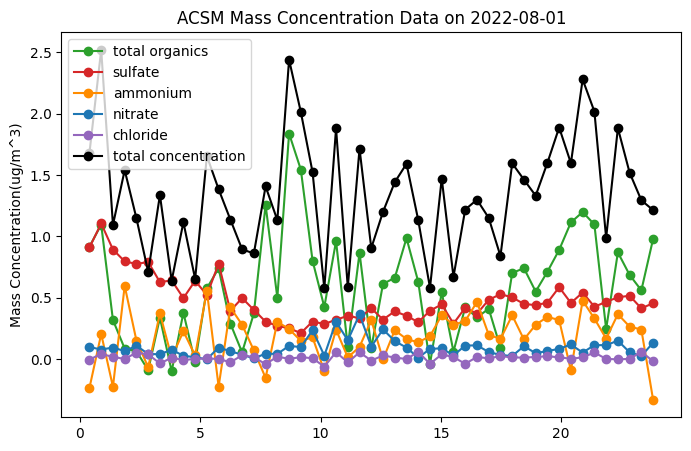

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:124: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:124: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:179: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:179: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g

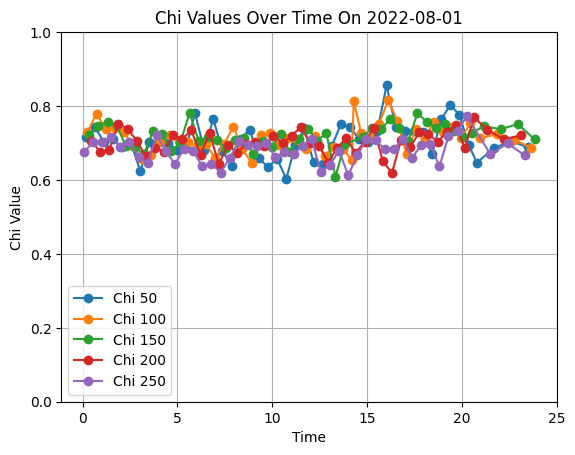

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:124: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:179: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:179: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:186: RuntimeWarning: invalid value encountered in divide
  chi = (D_alpha-1)/(D_gamma-1)


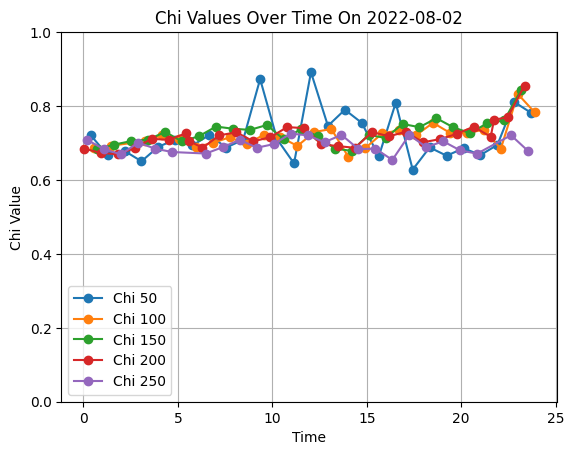

49
20220802


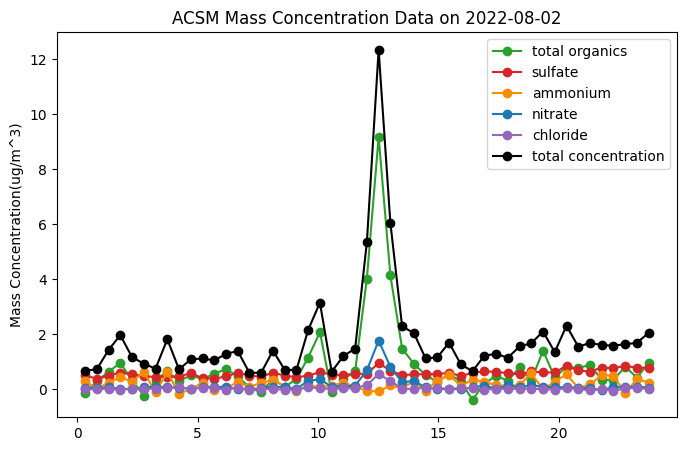

49
20220803


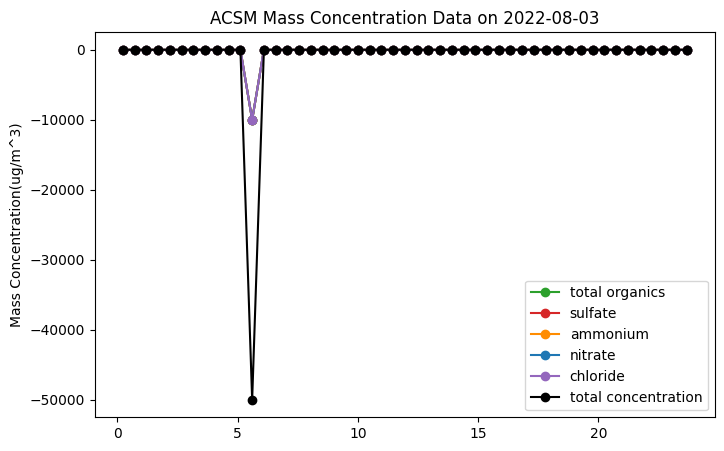

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


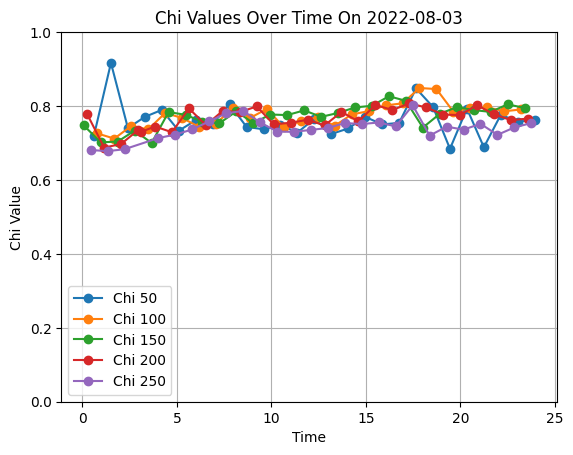

49
20220804


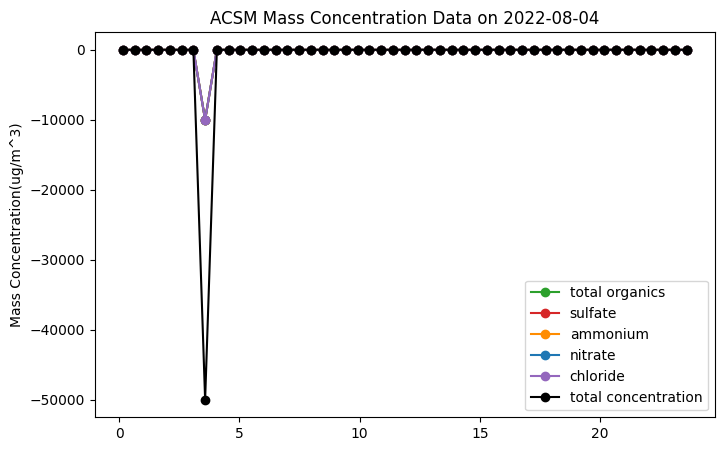

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


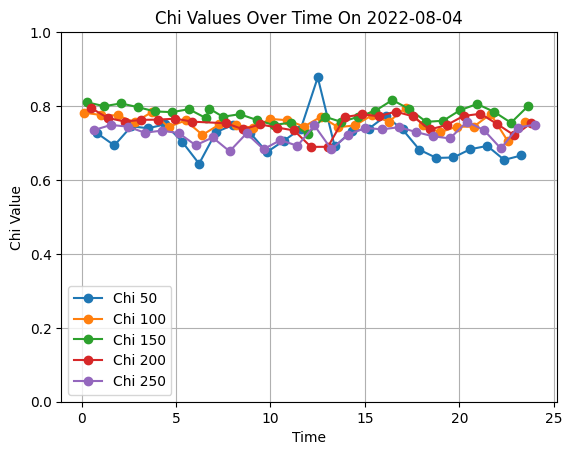

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


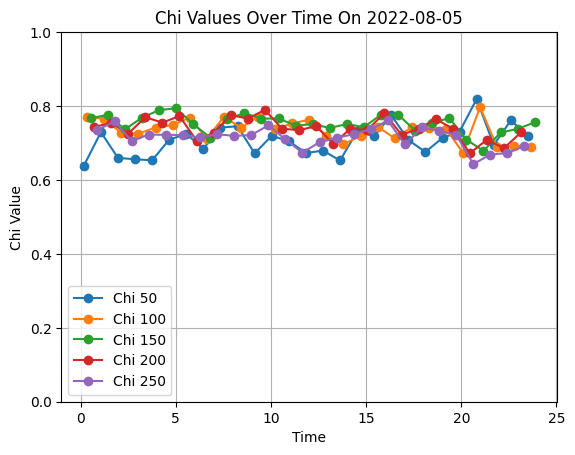

49
20220805


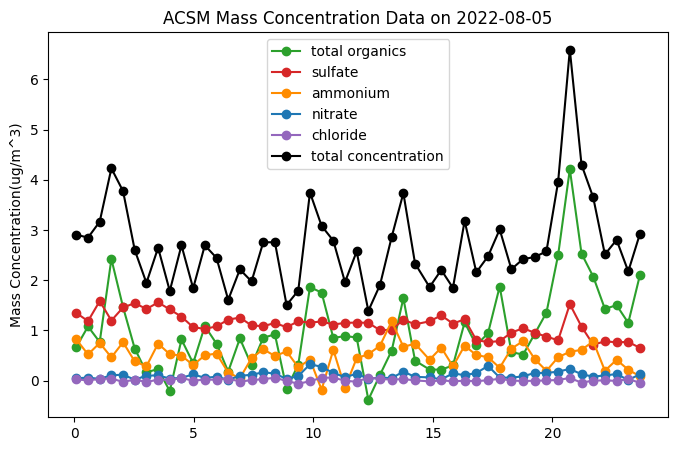

49
20220806


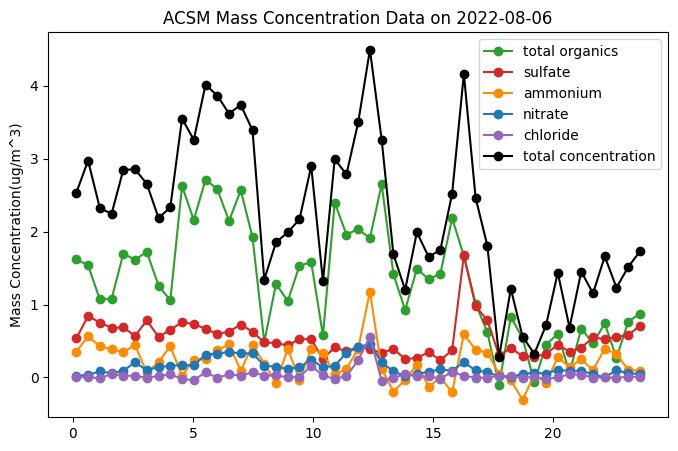

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


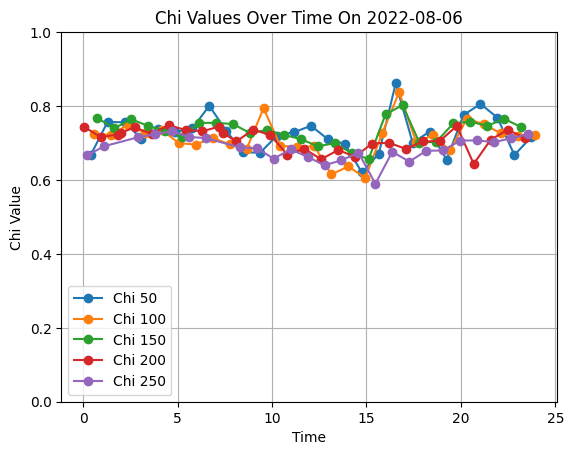

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


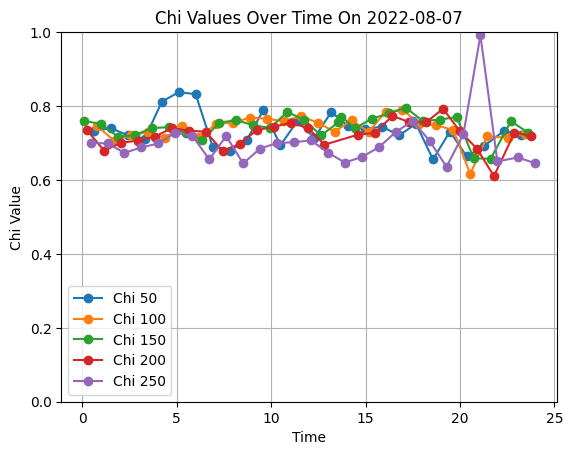

49
20220807


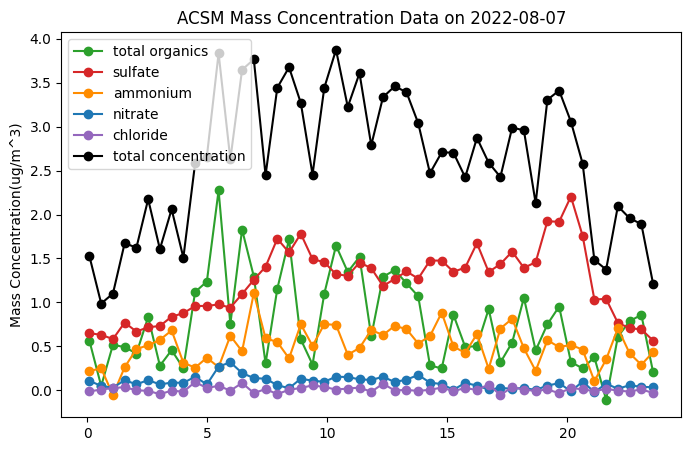

49
20220808


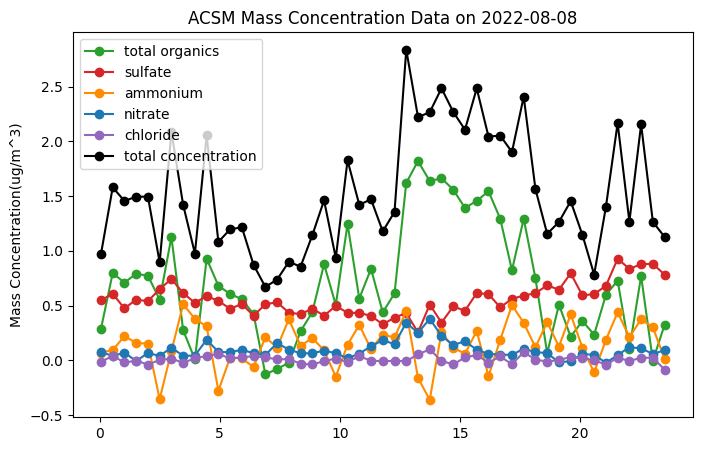

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


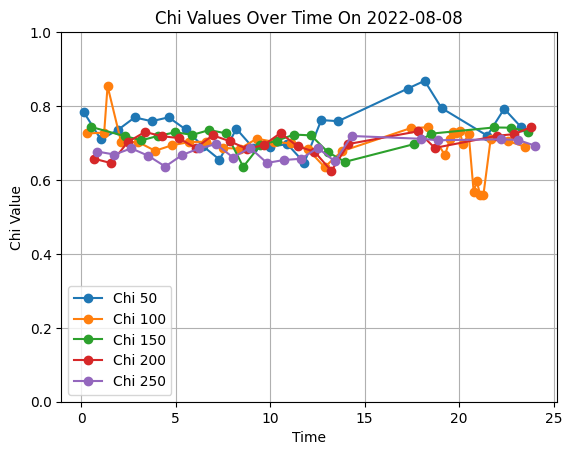

50
20220809


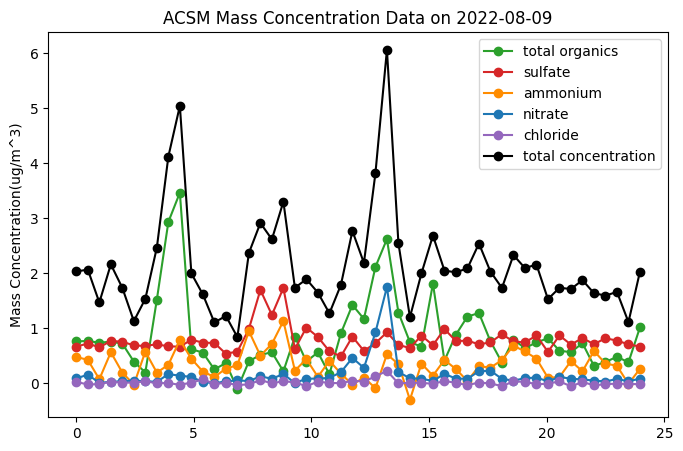

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:124: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:179: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:179: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_1056/447473059.py:186: RuntimeWarning: invalid value encountered in divide
  chi = (D_alpha-1)/(D_gamma-1)


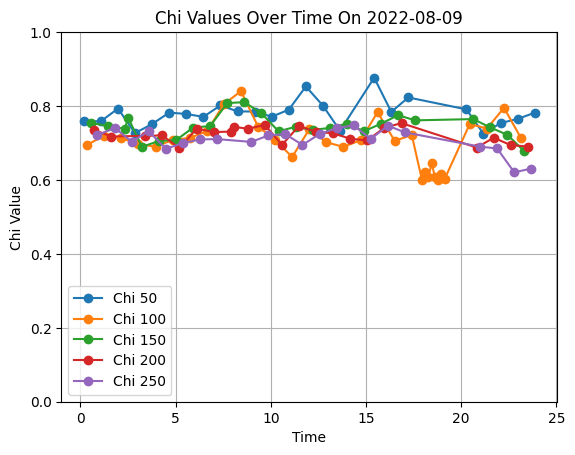

49
20220810


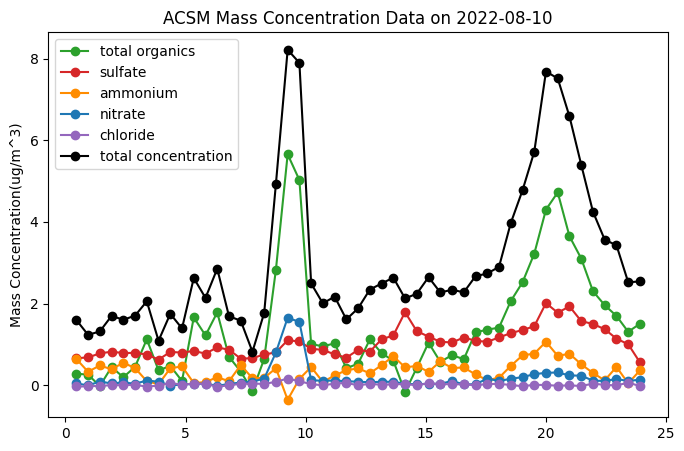

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


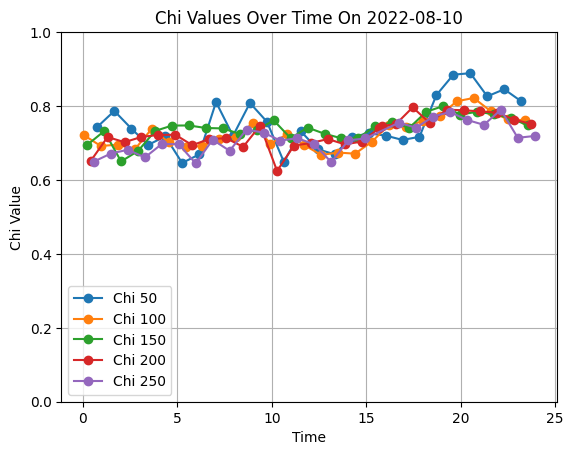

In [142]:
for date in dates:    
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filename = subdir + os.sep + file
            if 'houacsmcdceM1.c2.'+ str(date) in filename and ('.nc' in filename):
                ds = netCDF4.Dataset(filename)
                file_path = os.path.join(directory, filename)
                s1 = ds.dimensions['time']
                # print(filename)
                # print(s1)
                # print(len(s1))
                # print(s1.size)
                dim_time = s1.size
                print(dim_time)
                # define arrays
                time = np.zeros(dim_time)
                total_organics_i = np.zeros(dim_time)
                sulfate_i = np.zeros(dim_time)
                ammonium_i = np.zeros(dim_time)
                nitrate_i = np.zeros(dim_time)
                chloride_i = np.zeros(dim_time)
                total_conc_i = np.zeros(dim_time)

                ncf = scipy.io.netcdf_file(file_path, mmap=False)
                date = int(filename[-18:-10])
                print(date)

                time[:] = ncf.variables["time"].data/3600 # hr
                total_organics_i[:] = ncf.variables["total_organics_CDCE"].data # ug/m^3
                sulfate_i[:] = ncf.variables["sulfate_CDCE"].data # ug/m^3
                ammonium_i[:] = ncf.variables["ammonium_CDCE"].data # ug/m^3
                nitrate_i[:] = ncf.variables["nitrate_CDCE"].data # ug/m^3
                chloride_i[:] = ncf.variables["chloride_CDCE"].data # ug/m^3  
                total_conc_i[:] = total_organics_i + sulfate_i + ammonium_i + nitrate_i + chloride_i

                plt.figure(figsize=(8,5))
                plt.plot(time,total_organics_i, label='total organics', c='tab:green',marker='o')
                plt.plot(time,sulfate_i, label='sulfate', c='tab:red',marker='o')
                plt.plot(time,ammonium_i, label='ammonium', c='darkorange',marker='o')
                plt.plot(time,nitrate_i, label='nitrate', c='tab:blue',marker='o')
                plt.plot(time,chloride_i, label='chloride', c='tab:purple',marker='o')
                plt.plot(time,total_conc_i, label='total concentration', c='black',marker='o')
                date_str = f"{date:8}"  # Convert to string for formatting
                formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
                plt.title(f'ACSM Mass Concentration Data on {formatted_date}')
                # plt.xlabel('Time')
                plt.ylabel('Mass Concentration(ug/m^3)')
                plt.legend()
                # plt.savefig("/Users/evenhou/Downloads/plot_12_08.png")
                plt.show()
                
            elif 'houaoshtdmaM1.b1.'+ str(date) in filename and ('.nc' in filename):
                kappa_LH = 0.01
                kappa_MH = 0.65

                chi50 = np.array([]) 
                chi100 = np.array([])
                chi150 = np.array([])
                chi200 = np.array([])
                chi250 = np.array([])
                ds = netCDF4.Dataset(filename)
                s1 = str(ds.dimensions['time'])
                s2 = str(ds.dimensions['bin'])
                # print(s)
                x = -3
                if (s1[x-1:x+1] != '='):
                    dim_time = int(s1[x:])
                else:
                    dim_time = int(s1[x-1:])
                if (s2[x-1:x+1] != '='):
                    dim_bin = int(s2[x:])
                else:
                    dim_bin = int(s2[x-1:])
                # print(dim_time, dim_bin)
                # print(filename)

    # CHANGE HERE: define arrays
                time = np.zeros(dim_time)
                dry_dia = np.zeros(dim_time)
                kappa = np.zeros((dim_time, dim_bin))
                k_bound = np.zeros((dim_time, dim_bin,2))
                conc = np.zeros((dim_time, dim_bin))
                # date = np.zeros(dim_time)
                
    # CHANGE HERE: read data into arrays
                ncf = scipy.io.netcdf_file(filename, mmap=False)
                date = int(filename[-18:-10]) # read i.e. 20210427
            
                time[:] = ncf.variables["time"].data/3600 # hr
                dry_dia[:] = ncf.variables["dry_diameter_setting"].data # nm
                for i_time in range(dim_time):
                    kappa[i_time, :] = ncf.variables['kappa'][i_time, :]
                    k_bound[i_time, :, :] = ncf.variables['kappa_bounds'][i_time, :, :]
                    conc[i_time,:] = ncf.variables['aerosol_concentration'][i_time, :] # dN, unit: 1/cm^3
                # print(dry_dia)
                # print(k_bound)

    # calculations
                dK = np.zeros((dim_time,dim_bin))
                for i_time in range(dim_time):
                    dK[i_time, :] = k_bound[i_time, :, 1] -  k_bound[i_time, :, 0]
                conc_norm0 = np.zeros((dim_time,dim_bin)) # dN/dK
                for i_time in range(dim_time):
                    conc_norm0[i_time, :] = conc[i_time, :]/dK[i_time, :]
                
                # Create a mask for valid kappa values
                valid_kappa_mask = (kappa >= kappa_LH) & (kappa <= kappa_MH)
                date_str = f"{date:8}"  # Convert to string for formatting
                formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
                # Update conc matrix for invalid kappa values
                conc[~valid_kappa_mask] = 0
                N_tot = conc.sum(axis=1)
                # Check if there is 0 value in N_tot
                has_zero = np.any(N_tot == 0)
                #print(has_zero)
                # Find indices of zero values
                zero_indices = np.where(N_tot == 0)
                #print(zero_indices)
                # use pandas to manipulate data
                d = {'dry_dia': dry_dia, 'time':time, 'date':date, 'N_tot':N_tot}
                df = pd.DataFrame(data = d)
                conc_norm = np.zeros((dim_time,dim_bin))
                for i_time in range(dim_time):
                    conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
                
                newdf = pd.DataFrame(np.repeat(df.values, dim_bin, axis=0),
                                        columns=df.columns)
                # print(dim_bin)
                #print(newdf.shape)
                newdf['kappa'] = kappa.ravel() # K_i
                newdf['conc'] = conc.ravel()
                newdf['dK'] = dK.ravel()
                newdf['conc_norm0'] = conc_norm0.ravel()  # dN/dK
                rows_with_nan = np.where(np.isnan(conc_norm).any(axis=1))[0]
                #print("rows_with_nan",rows_with_nan)

                dNdK0 = np.array([])
                # Remove corresponding rows from both conc_norm, kappa, and dry_dia
                conc_norm_clean = np.delete(conc_norm, rows_with_nan, axis=0)
                kappa_clean = np.delete(kappa, rows_with_nan, axis=0)
                dry_dia_clean = np.delete(dry_dia, rows_with_nan, axis=0)
                time_clean = np.delete(time, rows_with_nan, axis=0)
                dNdK0 = np.append(dNdK0,conc_norm_clean)

                newdf['conc_norm'] = newdf['conc_norm0']/newdf['N_tot'] # dN°/dK = c(k)_i
                newdf['p_MH_i'] = (newdf.kappa-kappa_LH)/(kappa_MH-kappa_LH)
                newdf['p_LH_i'] = 1 - newdf['p_MH_i']

                newdf.loc[newdf['N_tot'] == 0, 'p_MH_i'] = 0
                newdf.loc[newdf['kappa'] < kappa_LH, 'p_MH_i'] = 0
                newdf.loc[newdf['kappa'] > kappa_MH, 'p_MH_i'] = 0

                newdf.loc[newdf['N_tot'] == 0, 'p_LH_i'] = 0
                newdf.loc[newdf['kappa'] < kappa_LH, 'p_LH_i'] = 0
                newdf.loc[newdf['kappa'] > kappa_MH, 'p_LH_i'] = 0

                newdf['H_i'] = -newdf.p_LH_i*np.log(newdf.p_LH_i)-newdf.p_MH_i*np.log(newdf.p_MH_i)
                newdf['H_alpha_i'] = newdf.H_i*newdf.conc_norm*newdf.dK
                newdf['p_mh_i'] = newdf.p_MH_i*newdf.conc_norm*newdf.dK
                newdf['p_lh_i'] = newdf.p_LH_i*newdf.conc_norm*newdf.dK

                newdf.loc[newdf['N_tot'] == 0, 'H_alpha_i'] = 0
                newdf.loc[newdf['kappa'] < kappa_LH, 'H_alpha_i'] = 0
                newdf.loc[newdf['kappa'] > kappa_MH, 'H_alpha_i'] = 0

                H_alpha = np.array([])
                p_MH = np.array([])
                p_LH = np.array([])
                for i in range(0,int(len(newdf)/60)):
                    h_alpha = (newdf.iloc[i*60:i*60+59].sum()).H_alpha_i
                    H_alpha = np.append(H_alpha,h_alpha)
                    p_mh = (newdf.iloc[i*60:i*60+59].sum()).p_mh_i
                    p_lh = (newdf.iloc[i*60:i*60+59].sum()).p_lh_i
                    p_MH = np.append(p_MH,p_mh)
                    p_LH = np.append(p_LH,p_lh)

                D_alpha = np.exp(H_alpha)
                # print(D_alpha)
                H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
                # print("H_gamma",H_gamma)

                H_gamma = np.nan_to_num(H_gamma)
                # print("H_gamma",H_gamma)

                D_gamma = np.exp(H_gamma)
                chi = (D_alpha-1)/(D_gamma-1)
                            # print("chi",chi)
                            # print(len(chi))

                df['p_MH'] = p_MH.tolist()
                df['p_LH'] = p_LH.tolist()
                df['D_alpha'] = D_alpha.tolist()
                df['D_gamma'] = D_gamma.tolist()
                df['chi'] = chi.tolist()
                # plt.scatter(time,p_LH)
                # print(df)

                df_valid = df[df['N_tot'] != 0]
                # print(df_valid.chi)
                df_valid = df.dropna(subset=["chi"])
                # print(df_valid.chi)
                # print(df_valid)
                chi_final = df_valid["chi"].to_numpy()

                df50 = df_valid[df_valid["dry_dia"] == 50]
                df100 = df_valid[df_valid["dry_dia"] == 100]
                df150 = df_valid[df_valid["dry_dia"] == 150]
                df200 = df_valid[df_valid["dry_dia"] == 200]
                df250 = df_valid[df_valid["dry_dia"] == 250]

                time50_i = df50["time"].to_numpy()
                chi50_i = df50["chi"].to_numpy()
                chi50 = np.append(chi50,chi50_i)
                # print("chi50",chi50)
                # print(len(chi50))
                # print("len of chi50",len(chi50))

                chi100_i = df100["chi"].to_numpy()
                chi100 = np.append(chi100,chi100_i)
                # print("chi100",chi100)8210
                # print("len of chi100",len(chi100))
                chi150_i = df150["chi"].to_numpy()
                chi150 = np.append(chi150,chi150_i)

                chi200_i = df200["chi"].to_numpy()
                chi200 = np.append(chi200,chi200_i)

                chi250_i = df250["chi"].to_numpy()
                chi250 = np.append(chi250,chi250_i)

                plt.plot(df50.time, chi50, label='Chi 50', marker='o')
                plt.plot(df100.time, chi100, label='Chi 100', marker='o')
                plt.plot(df150.time, chi150, label='Chi 150', marker='o')
                plt.plot(df200.time, chi200, label='Chi 200', marker='o')
                plt.plot(df250.time, chi250, label='Chi 250', marker='o')
                date_str = f"{date:8}"  # Convert to string for formatting
                formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
                plt.title(f'Chi Values Over Time On {formatted_date}')
                plt.xlabel('Time')
                plt.ylabel('Chi Value')
                plt.ylim(0, 1)
                plt.legend()
                plt.grid(True)
                # plt.savefig(f'/Users/evenhou/Downloads/{formatted_date}.png')
                plt.show()